## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


### 1) Confidence Intervals:


In [1]:
# TODO - your code!
import pandas as pd
import scipy.stats as stats
import numpy as np
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"
names=['party', 'handicapped-infants', 'water-project', 
'budget', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups', 
'anti-satellite-ban', 'aid-to-contras', 'mx-missile', 'immigration', 
'synfuels', 'education', 'right-to-sue', 'crime', 'duty-free', 
'south-africa']
df = pd.read_csv(url, names=names)
df.replace({'?':np.NaN, 'y':1, 'n':0}, inplace=True)
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [2]:
df.describe()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,423.000000,387.000000,424.000000,424.000000,420.000000,424.000000,421.000000,420.00000,413.000000,428.000000,414.000000,404.000000,410.000000,418.000000,407.000000,331.000000
mean,0.442080,0.503876,0.596698,0.417453,0.504762,0.641509,0.567696,0.57619,0.501211,0.504673,0.362319,0.423267,0.509756,0.593301,0.427518,0.812689
std,0.497222,0.500632,0.491140,0.493721,0.500574,0.480124,0.495985,0.49475,0.500605,0.500563,0.481252,0.494690,0.500516,0.491806,0.495327,0.390752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
df['handicapped-infants'].mean()

0.44208037825059104

In [4]:
# Sample Size
n = len(df['handicapped-infants'])
# Degrees of Freedom
dof = n-1
# The Mean of Means:
mean = df['handicapped-infants'].mean()
# Sample Standard Deviation
sample_std = df['handicapped-infants'].std()
# Standard Error
std_err = sample_std/n**.5

CI = stats.t.interval(.95, dof, loc=mean, scale=std_err)
print("95% Confidence Interval: ", CI)
confidence_level = 0.95
t = stats.t.ppf((1+confidence_level)/2, n-1)
print("t-statistic: ", t)

95% Confidence Interval:  (0.3952242201512401, 0.488936536349942)
t-statistic:  1.9654450635078535


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


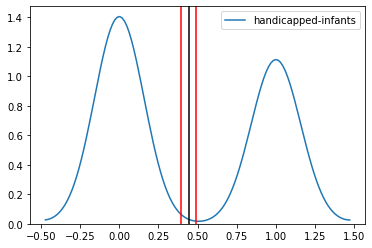

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(df['handicapped-infants']);
#CI = confidence_interval(df['handicapped-infants'].values)
plt.axvline(x = mean, color = 'k');
plt.axvline(x = CI[0], color = 'red');
plt.axvline(x = CI[1], color = 'red');

The confidence interval of (0.3952, 0.4889) tells us that we are 95% confident that the population mean is is in between this interval. From this we can say that it is more likely that the handicapped infants bill will not pass congress.

### 2) $\chi^2$ Tests

For the $\chi^2$ tests, we'l use the adult dataset form UCI. 
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

In [14]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                 'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                 'capital-gain', 'capital-loss', 'hours-per-week', 
                 'native-country', 'income']
df = pd.read_csv(url, names=column_headers)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [23]:
df.describe(include=np.object)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [32]:
df.replace(' ?', np.NaN, inplace=True)
#replace all ' ?' missing values as Nan types
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

### By hand using Numpy

In [33]:
#we will compare education and occupation 
contingency_table = pd.crosstab(df['education'], df['occupation'], margins=True)
contingency_table

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,All
education,,,,,,,,,,,,,,,
10th,38,0,170,24,44,71,101,194,6,9,6,81,3,84,831
11th,67,0,175,34,37,123,99,238,14,20,7,144,6,92,1056
12th,38,1,58,13,16,38,35,85,4,10,6,47,3,39,393
1st-4th,0,0,23,4,18,16,23,40,11,4,1,8,0,8,156
5th-6th,6,0,43,1,36,40,56,64,14,1,1,12,1,28,303
7th-8th,11,0,116,19,70,46,93,98,8,9,9,29,5,60,573
9th,14,0,96,13,28,49,76,101,10,3,4,32,2,35,463
Assoc-acdm,193,0,115,145,14,24,33,78,2,138,34,144,73,27,1020
Assoc-voc,167,0,252,150,52,28,63,115,4,170,48,106,126,40,1321


In [0]:
observed = pd.crosstab(df['education'], df['occupation']).values

In [42]:
contingency_table.shape

(17, 15)

In [38]:
#make expected values table

#grab cells corresponding to each row
dem_table = contingency_table.iloc[0][0:2].values
rep_table = contingency_table.iloc[1][0:2].values
print(dem_table, rep_table)

[38  0] [67  0]


In [44]:
#calculate row and column totals to use in the expected value calcs
row_sums = contingency_table.iloc[0:16, 14].values
col_sums = contingency_table.iloc[16, 0:14].values

print(row_sums)
print(col_sums)

#sample size from crosstab
total = contingency_table['All']['All']
total

[ 831 1056  393  156  303  573  463 1020 1321 5182  398 9968 1675   46
  558 6775]
[3770    9 4099 4066  994 1370 2002 3295  149 4140  649 3650  928 1597]


30718

In [0]:
#calculating table of expected values
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for col in col_sums:
    expected_val = col*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)

In [47]:
chi_squared = (((observed - expected)**2)/expected).sum()
print('Chi-Squared: ', chi_squared)

Chi-Squared:  15568.48427339498


In [48]:
#Degrees of freedom with chi-squared test:
#dof = (num_rows-1)*(num_cols-1)
#Calculate degrees of freedom
dof = (len(row_sums)-1)*(len(col_sums)-1)
print('Degrees of Freedom: ',dof)

Degrees of Freedom:  195


In [49]:
from scipy.stats.distributions import chi2
print('P-value fomr chi2 statistic:', chi2.sf(chi_squared, df=1))

P-value fomr chi2 statistic: 0.0


### Using Scipy

In [52]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print('Chi2: ', chi_squared)
print('P-value: ', p_value)
print('Degrees of Freedom: ', dof)
#print('Expected: ', expected)


Chi2:  15568.48427339498
P-value:  0.0
Degrees of Freedom:  195


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)